<a href="https://colab.research.google.com/github/Angy-face/Esan-Coding-SS2/blob/main/Medium_Gym_member_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Get Data

In [480]:
!pip install -U pandas-profiling

In [481]:
import kagglehub
import pandas as pd
import shutil as st
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [482]:
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")
st.move(path,"/content/Data")


Error: Destination path '/content/Data/1' already exists

In [624]:
df = pd.read_csv("/content/Data/gym_members_exercise_tracking.csv")
df.rename(columns={'Weight (kg)':'Weight',
                   'Height (m)':'Height',
                   'Session_Duration (hours)':'Session_Duration',
                   'Water_Intake (liters)':'Water_Intake',
                   'Workout_Frequency (days/week)':'Workout_Frequency' },inplace = True)
df

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


# 2. Clean Data and Data Preparation


In [625]:
df.describe()

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                973 non-null    int64  
 1   Gender             973 non-null    object 
 2   Weight             973 non-null    float64
 3   Height             973 non-null    float64
 4   Max_BPM            973 non-null    int64  
 5   Avg_BPM            973 non-null    int64  
 6   Resting_BPM        973 non-null    int64  
 7   Session_Duration   973 non-null    float64
 8   Calories_Burned    973 non-null    float64
 9   Workout_Type       973 non-null    object 
 10  Fat_Percentage     973 non-null    float64
 11  Water_Intake       973 non-null    float64
 12  Workout_Frequency  973 non-null    int64  
 13  Experience_Level   973 non-null    int64  
 14  BMI                973 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 114.1+ KB


In [627]:
df.isna().sum()

,0
Age,0
Gender,0
Weight,0
Height,0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration,0
Calories_Burned,0
Workout_Type,0


In [628]:
df.groupby(["Gender",'Workout_Type']).Calories_Burned.mean()

Gender  Workout_Type
Female  Cardio          834.793651
        HIIT            869.953271
        Strength        863.097561
        Yoga            886.122642
Male    Cardio          933.077519
        HIIT            978.228070
        Strength        954.066667
        Yoga            916.789474
Name: Calories_Burned, dtype: float64

In [629]:
df

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


#3.Data Visualization // Data Analysis

In [630]:
# profile = ProfileReport(df)

In [631]:
cal_mean = df.groupby(['Workout_Type',"Gender"]).Calories_Burned.mean()
cal_mean

Workout_Type  Gender
Cardio        Female    834.793651
              Male      933.077519
HIIT          Female    869.953271
              Male      978.228070
Strength      Female    863.097561
              Male      954.066667
Yoga          Female    886.122642
              Male      916.789474
Name: Calories_Burned, dtype: float64

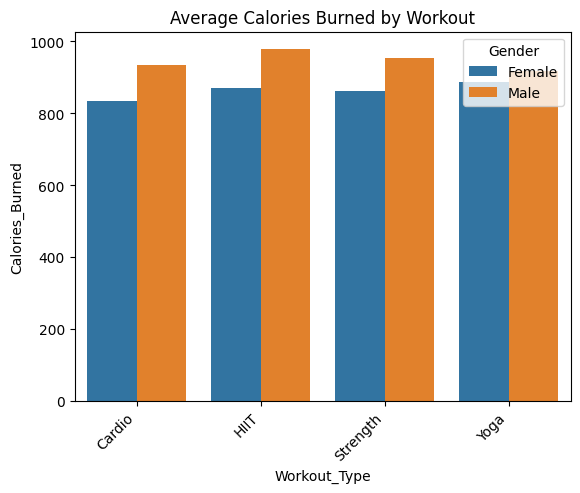

In [632]:
cal_mean = df.groupby(['Workout_Type', "Gender"]).Calories_Burned.mean().reset_index()

sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Gender', data=cal_mean)
plt.xticks(rotation=45, ha='right')
plt.title('Average Calories Burned by Workout')
plt.show()

In [633]:
df.corr(method='pearson', numeric_only=True)

,Age,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight,-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height,-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration,-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake,0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


<Axes: xlabel='Session_Duration', ylabel='Calories_Burned'>

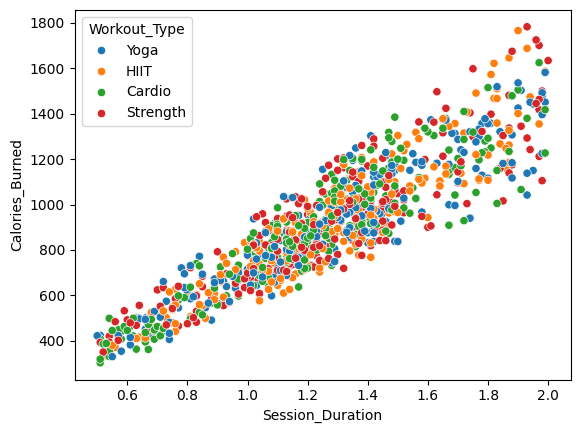

In [634]:
sns.scatterplot(data=df, x="Session_Duration", y="Calories_Burned", hue="Workout_Type")

# 4. Create Model

ใช้One-hot เพราะ เป็น catagory ที่ไม่มีความเกี่ยวข้องกัน หาใช้Label อาจทำให้โมเดลเกิดความเข้าใจที่ผิด เช่น 1<2<3<4

In [635]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [636]:
label = LabelEncoder()
onehot = OneHotEncoder()
df["Gender"] = label.fit_transform(df["Gender"])
# df["Workout_Type"] = label.fit_transform(df["Workout_Type"])
workout_type = pd.DataFrame(onehot.fit_transform(df[["Workout_Type"]]).toarray().astype(int),columns=df["Workout_Type"].unique())
df = pd.concat([df,workout_type],axis=1)
df

,Age,Gender,Weight,Height,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake,Workout_Frequency,Experience_Level,BMI,Yoga,HIIT,Cardio,Strength
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,0,0,0,1
1,46,0,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0,1,0,0
2,32,0,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,1,0,0,0
3,25,1,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,0,0,1,0
4,38,1,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77,0,0,1,0
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69,0,0,1,0
970,59,0,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50,1,0,0,0
971,32,1,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74,0,1,0,0


In [637]:
df.drop(columns=["Weight"],inplace=True)
df.drop(columns=["Height"],inplace=True)
df.drop(columns=["Max_BPM"],inplace=True)
df.drop(columns=["Resting_BPM"],inplace=True)
df.drop(columns=["Water_Intake"],inplace=True)
df.drop(columns=["Workout_Frequency"],inplace=True)
df.drop(columns=["Workout_Type"],inplace=True)
df

,Age,Gender,Avg_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Experience_Level,BMI,Yoga,HIIT,Cardio,Strength
0,56,1,157,1.69,1313.0,12.6,3,30.20,0,0,0,1
1,46,0,151,1.30,883.0,33.9,2,32.00,0,1,0,0
2,32,0,122,1.11,677.0,33.4,2,24.71,1,0,0,0
3,25,1,164,0.59,532.0,28.8,1,18.41,0,0,1,0
4,38,1,158,0.64,556.0,29.2,1,14.39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,158,1.57,1364.0,10.0,3,28.77,0,0,1,0
969,25,1,166,1.38,1260.0,25.0,1,25.69,0,0,1,0
970,59,0,120,1.72,929.0,18.8,3,19.50,1,0,0,0
971,32,1,146,1.10,883.0,28.2,2,37.74,0,1,0,0


In [638]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

df["Avg_BPM"] = minmax.fit_transform(df[["Avg_BPM"]])
df["Age"] = minmax.fit_transform(df[["Age"]])
df["Session_Duration"] = minmax.fit_transform(df[["Session_Duration"]])
df["Fat_Percentage"] = minmax.fit_transform(df[["Fat_Percentage"]])
df["Experience_Level"] = minmax.fit_transform(df[["Experience_Level"]])
df["BMI"] = minmax.fit_transform(df[["BMI"]])
df

,Age,Gender,Avg_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Experience_Level,BMI,Yoga,HIIT,Cardio,Strength
0,0.926829,1,0.755102,0.793333,1313.0,0.104,1.0,0.476546,0,0,0,1
1,0.682927,0,0.632653,0.533333,883.0,0.956,0.5,0.524520,0,1,0,0
2,0.341463,0,0.040816,0.406667,677.0,0.936,0.5,0.330224,1,0,0,0
3,0.170732,1,0.897959,0.060000,532.0,0.752,0.0,0.162313,0,0,1,0
4,0.487805,1,0.775510,0.093333,556.0,0.768,0.0,0.055171,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
968,0.146341,1,0.775510,0.713333,1364.0,0.000,1.0,0.438433,0,0,1,0
969,0.170732,1,0.938776,0.586667,1260.0,0.600,0.0,0.356343,0,0,1,0
970,1.000000,0,0.000000,0.813333,929.0,0.352,1.0,0.191365,1,0,0,0
971,0.341463,1,0.530612,0.400000,883.0,0.728,0.5,0.677505,0,1,0,0


In [640]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [727]:
X = df.drop(columns=["Calories_Burned",'Experience_Level'])
y = df["Calories_Burned"]

In [728]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,shuffle=True)
pd.concat([X_train,y_train],axis=1)

,Age,Gender,Avg_BPM,Session_Duration,Fat_Percentage,BMI,Yoga,HIIT,Cardio,Strength,Calories_Burned
967,0.048780,1,0.979592,0.413333,0.560,0.244136,0,0,0,1,1035.0
365,0.512195,0,0.959184,0.280000,0.704,0.264925,0,1,0,0,768.0
559,0.878049,0,0.693878,0.313333,0.656,0.352612,1,0,0,0,672.0
33,0.146341,0,0.755102,0.360000,0.868,0.360075,1,0,0,0,816.0
31,0.048780,0,0.142857,0.353333,0.720,0.426173,0,0,0,1,654.0
...,...,...,...,...,...,...,...,...,...,...,...
106,0.560976,1,0.979592,0.006667,0.692,0.168977,0,0,0,1,424.0
270,0.024390,0,0.326531,0.600000,0.912,0.171908,0,1,0,0,952.0
860,0.121951,0,0.244898,0.586667,0.960,0.300640,1,0,0,0,911.0
435,0.804878,0,0.448980,0.620000,0.696,0.338486,1,0,0,0,914.0


In [739]:
model = MLPRegressor(hidden_layer_sizes=(8,16,32,16,8),
                      activation='relu',
                      solver='adam',
                      alpha=0.01,
                      batch_size='auto',
                      learning_rate='adaptive',
                      learning_rate_init=0.01,
                      max_iter=150,
                      random_state=42,
                     momentum=0.8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_acc  =model.score(X_test,y_test)
train_acc =model.score(X_train,y_train)
mae = mean_absolute_error(y_test,y_pred)
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")
print(f"MAE: {mae}")

Train Accuracy: 0.9801617997820712
Test Accuracy: 0.9821521626138566
MAE: 29.009770054419615


In [740]:
df_pred = pd.DataFrame(y_pred, index=y_test.index, columns=["Predict"]) # Assign y_test's index
result_df = pd.concat([y_test, df_pred], axis=1)
result_df["loss"] = abs(result_df["Calories_Burned"] - result_df["Predict"])

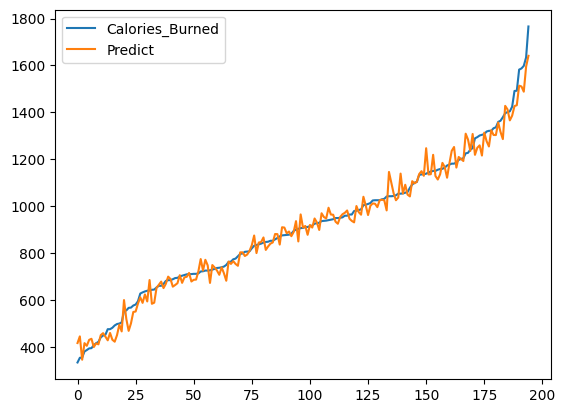

In [741]:
result_df.sort_values(by="Calories_Burned",ascending=True,inplace=True)
result_df.reset_index(drop=True,inplace=True)
plt.plot(result_df["Calories_Burned"],label="Calories_Burned")
plt.plot(result_df["Predict"],label="Predict")
plt.legend()


In [742]:
result_df

,Calories_Burned,Predict,loss
0,333.0,415.870199,82.870199
1,353.0,444.325886,91.325886
2,354.0,344.803267,9.196733
3,380.0,415.532759,35.532759
4,386.0,404.140730,18.140730
...,...,...,...
190,1582.0,1513.408087,68.591913
191,1587.0,1510.182220,76.817780
192,1598.0,1487.885343,110.114657
193,1634.0,1594.530784,39.469216


Text(0, 0.5, 'Loss')

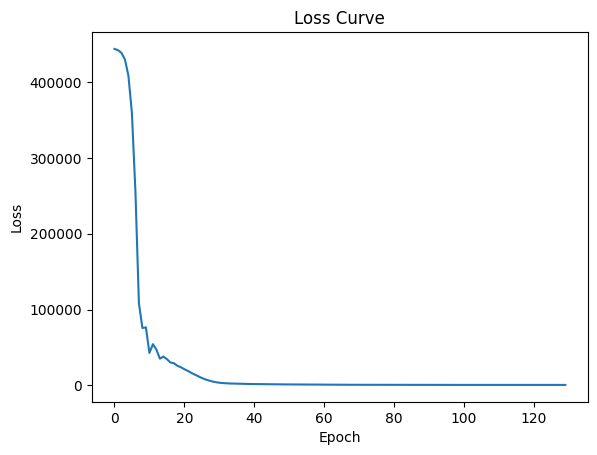

In [743]:
plt.title("Loss Curve")
plt.plot(model.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Loss")